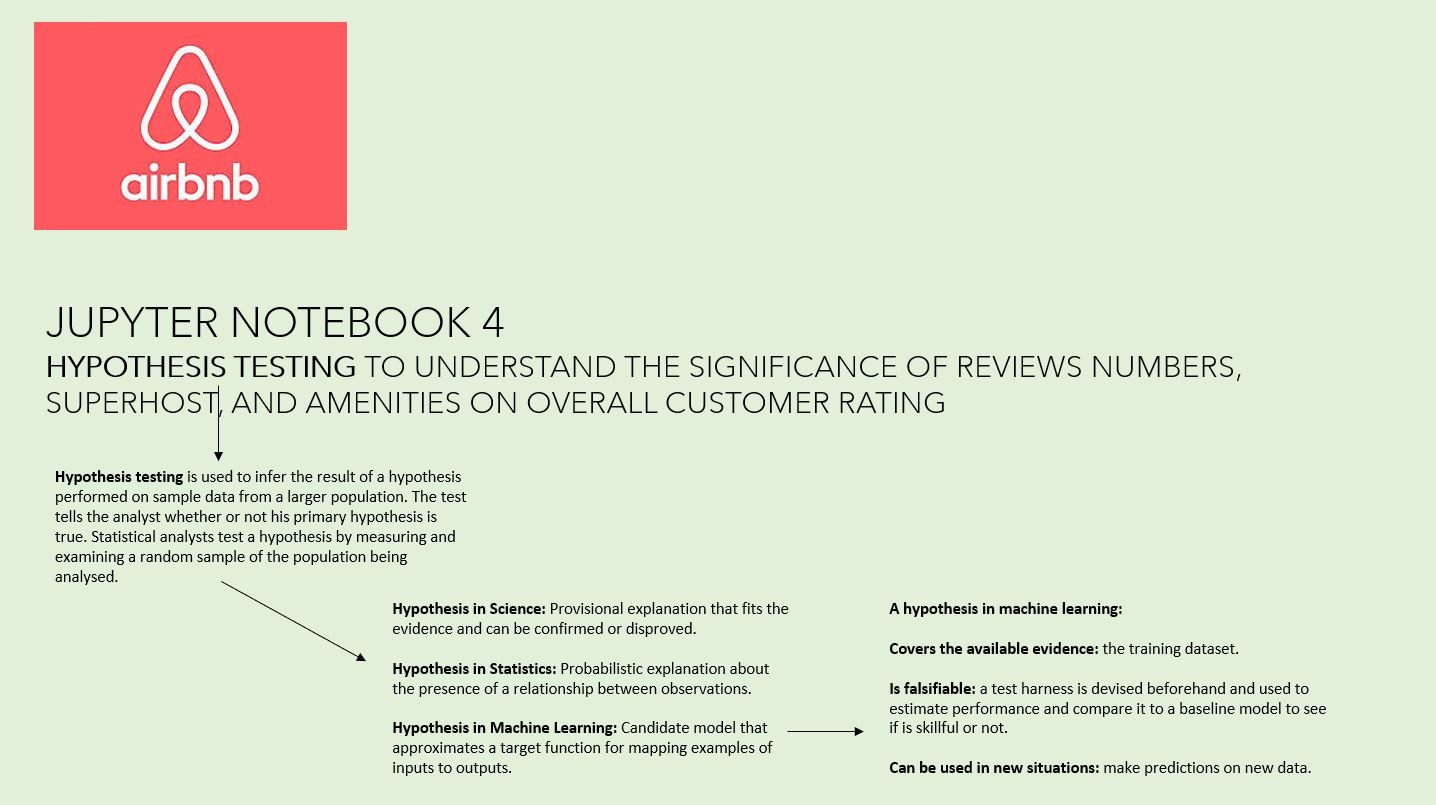

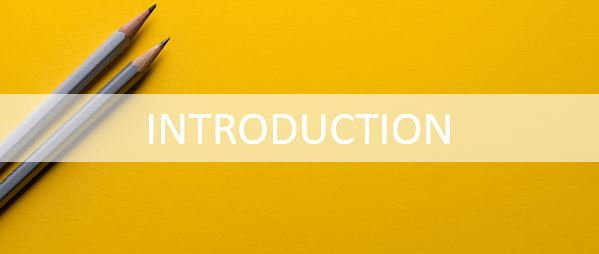

### About Airbnb

Together with Uber, the word Airbnb is synonymous with the sharing economy. Airbnb is the most global online hospitality service that connects travelers with lodging from local homeowners. It is a marketplace for individuals to book or offer rooms. With services across numerous cities across the globe, Airbnb contains massive amounts of data on thousands of listings per region. There are unique listings in 81,000 cities, with over 6 million listings, in over 191 Countries.

This jupyter notebook project attempts to experiment and focus on the behavioural sciences of nudging and sentiment analysis. I am starting with the point of adventuring into the unknown: colliding behavioural science and data science. There could be no significant outcome; however I gut feel say there will be some (yeah, we are still human, gut feel sometimes still help, rather than base on pure data decision-making!). 

**The Key Objective of this Jupyter Notebook Project:**
To run hypothesis testing exercise on Airbnb customer reviews with the following hypotheses:

1. Hypothesis Test 1 Numbers of Reviews Per Month and High Airbnb Rating Given to Host.

2. Hypothesis Test 2 High Amenities Numbers and High Airbnb Rating Given to Host.

3. Hypothesis Test 3 Host is a Superhost and High Airbnb Rating Given to Host.


### AIRBNB REVIEWS - FEEDBACK LOOP (AND OVERLOAD!)

**REVIEWS**

There are different types of Airbnb reviews that Airbnb guests can leave.

**1. Public reviews** - These reviews are visible to everyone in the community.

**2. Private reviews** - These are private messages a host.

**3. Group reviews** - These are public review that appears on the profiles of all of the guests on the reservation. There are no group reviews for Airbnb hosts.

**4. Cancellation reviews** - If you cancel a reservation as a host, an automated review will be posted to your profile. These reviews are one of the host cancellation penalties and cannot be removed. But you, as a host, can write a public response to clarify why you needed to cancel.

**5. Star ratings (reviews)** - These are quantitative ratings for hosts from 1 (worst) to 5 (best) for the overall experience and for specific categories, including: 
    
    a. Overall experience
    
    b. Accuracy
    
    c. Cleanliness
    
    d. Check-in
    
    e. Communications
    
    f. Location
    
    g. Values

Getting 3 star ratings or more will get a host rating appears on his/her listing or profile.

### TOP 3 INFLUENTIAL / PREDICTORS OF OVERALL GOOD RATING

Based on earlier predictive modeling (refer to JB#$ Airbnb + Predictive Modelling; Random Forest Analysis), we know that the top 3 influential / predictors of overall good rating reviews are as follow:

**1. Number of reviews per month**

**2. Whether the host is a super-host**

Airbnb’s Superhost program recognizes hosts who go above and beyond for every guest. Superhosts enjoy increased visibility in search results on Airbnb, exclusive perks, insider access, and an expanded set of business tools for hosting.

The current criteria for achieving Superhost status is as follows:

a. Achieve a 4.8 overall rating or higher;
b. Respond within 24 hours at least 90 percent of the time;
c. Have no cancellations and honor every reservation (unless there is an extenuating circumstance).
d. Host at least 10 stays a year;

**3. The number of amenities (or valuable amenities) in the host's home**

Based on the Airbnb article (Amenities Do Matter: Airbnb Reveals Which Amenities Travelers Value Most), 97 percent of US travelers surveyed say amenities impact their travel experience.

*Functionality first* 

As for the most important traits travelers look for in an amenity? The majority of the countries surveyed rate functionality first, like a coffee maker or a full set of wine glasses, with strong showings in Australia (57%), China (46%) and the US (43%), and thoughtfulness second, like a bottle of wine, a bicycle to get around town, or a beach bag already packed with everything needed for a day in the sun.

*Comfort over connectivity*

In today’s world of being constantly connected, it was a surprise to find modern vacationers value comfort over connectivity, with the majority of those surveyed in the US (59%), Australia (46%) and Italy (39%) citing air conditioning as one of the most important indoor amenities over Internet/WIFI and full kitchens.


*Pools, parking, pets*

Everyone loves the luxury and look of a beautiful pool, but perks like free parking, and pet-friendly rise to the top too. The majority of countries surveyed rated pools a top amenity but people in the US, Australia and Canada prefer free parking. And pet-loving travelers appreciate the ability to bring along their most trusted companions with 29% prioritizing pet-friendly as an important amenity.

# THE SCIENCE OF CUSTOMERS REVIEW

Location! Location! Location! This is a common, ground truth about buying a great place to call home. 

Reviews! Reviews! Reviews! This is an increasing common, ground truth for most (if not all) social/sharing/e-commerce platforms like Airbnb, Tripadvisor, etc., where reviews create opportunities and challenges. 

If a home gets great customer reviews (at Airbnb site), the chances are this particular home will be fully occupied most of the year (or Airbnb called it a rare find). This is the new social capital or reputation capital. I believe there is value in reviews; potentially we can place a monetary value into reviews (this will be a good research musing!). Here are some of the equations that I found scraping the web so far. 

Good reviews = Higher reputation/ trust of your product/ service.

Good reviews = Drive more business

Good reviews = Shape your business models e.g. free risk purchase, partnership opportunity with bigger brand. 

Good reviews = Increasing purchase decision-making speed

Good reviews = Create an ever increasing spiral of good reviews.

Good reviews = Inspired confidence

Good reviews = Less selling

Good reviews = Changes others initial perception 

Good reviews = Higher trust factor than own marketing machine

Good reviews = A very high reviews (customers expect to find the best of the best deal/experience or they will switch)

Good reviews = A trend-line of more positives than negatives (its a two-way streets like Uber, Airbnb - both host and guest can rate each other)

Good reviews = A trend-line of being interactive, a dialogue between host and guest.

Good reviews = Creates a feel good factor, even for those who give out reviews (hey, I am making a difference!)










### IMPORTING LIBRARIES

In [1]:
# importing necessary libraries

import pandas as pd
from pandas.tools import plotting
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import Counter
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, plot, iplot
import seaborn as sns
import xgboost as xgb
from datetime import datetime
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline
plt.style.use('seaborn')
mpl.style.use('ggplot')
sns.set(style='whitegrid')

# importing map visulization libraries
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from geopy.distance import vincenty

# importing Sci-kit Learn libraries
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Imputer, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report, accuracy_score, roc_curve, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

# importing Natural Language Toolkits
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# importing Sci-py libraries
from scipy.stats import ttest_ind

# importing statsmodels to perform statistical analysis
import statsmodels.api as sm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
from statsmodels.formula.api import ols

# importing Predictive Analytics/ Machine Learning libraries
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers


# for oversampling library (dealing with Imbalanced Datasets)
from collections import Counter

# other libraries
import time

# printing style available
print(plt.style.available)

# importing Predictive Analytics/ Machine Learning libraries
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# Change pandas viewing options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Using TensorFlow backend.


['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


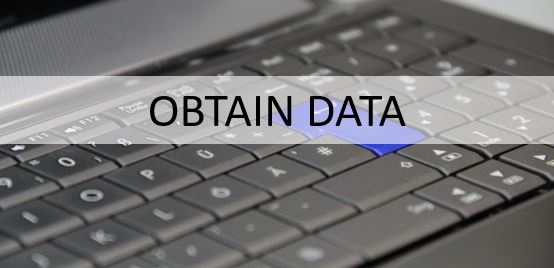

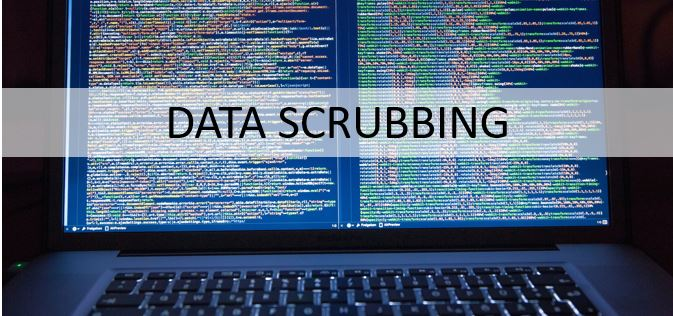


In [2]:
# extracting data from previous data extraction

Listings_Filtered_V2 = pd.read_csv('Listings_Filtered.csv', low_memory=False)
Listings_Filtered_V2.head(20)

,host_is_superhost,host_has_profile_pic,host_identity_verified,room_type,accommodates,price,guests_included,extra_people,minimum_nights,maximum_nights,review_scores_rating,review_scores_cleanliness,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,is_Wifi,amenities_number
0,1.0,1.0,0.0,2,2,50.0,1,0.0,3,60,95.0,10.0,1,1,1,2.01,1,38
1,0.0,1.0,0.0,3,2,88.0,1,42.0,3,30,99.0,10.0,0,1,1,1.02,1,28
2,0.0,1.0,1.0,3,4,130.0,2,10.0,3,28,96.0,9.0,0,1,0,1.70,1,34
3,0.0,1.0,0.0,2,2,30.0,1,10.0,1,5,NaN,NaN,0,0,0,0.65,1,15
4,1.0,1.0,0.0,2,2,50.0,1,0.0,3,14,96.0,10.0,1,1,1,1.50,1,22
5,1.0,1.0,0.0,2,2,60.0,1,35.0,2,100,96.0,9.0,1,0,0,1.01,1,18
6,0.0,1.0,0.0,2,2,55.0,1,13.0,2,14,94.0,9.0,0,0,0,1.13,1,15
7,0.0,1.0,0.0,2,1,30.0,1,0.0,1,14,95.0,9.0,1,0,1,3.12,1,28
8,1.0,1.0,1.0,2,6,55.0,2,30.0,1,12,96.0,10.0,0,0,0,4.95,1,36
9,0.0,1.0,1.0,3,5,147.0,3,0.0,3,365,91.0,9.0,0,0,0,0.37,1,22


In [3]:
# checking the values

Listings_Filtered_V2['reviews_per_month'].value_counts(normalize = True)

1.00     0.020946
0.05     0.011647
0.06     0.011617
0.09     0.011295
0.17     0.011001
0.04     0.009798
0.13     0.009006
0.03     0.008889
2.00     0.008860
0.10     0.008625
0.11     0.008537
0.08     0.008420
0.02     0.008126
0.16     0.007980
0.26     0.007364
0.07     0.007334
0.28     0.007099
0.18     0.006865
0.19     0.006777
0.22     0.006483
0.14     0.006483
0.20     0.006278
0.12     0.006278
0.15     0.006073
0.37     0.005985
0.21     0.005897
0.23     0.005574
3.00     0.005515
0.30     0.005369
0.34     0.005281
0.25     0.005163
0.27     0.005075
0.38     0.004958
0.24     0.004929
0.29     0.004811
0.35     0.004811
0.39     0.004782
0.43     0.004635
0.32     0.004577
0.46     0.004459
0.56     0.004430
0.47     0.004401
0.36     0.004371
0.31     0.004254
0.42     0.004224
0.65     0.004136
0.40     0.004107
0.45     0.003755
0.49     0.003667
0.55     0.003667
0.63     0.003608
0.33     0.003579
0.60     0.003579
0.53     0.003550
0.61     0.003520
0.71     0

In [4]:
map(lambda v:0 if np.isnan(v) == True else v, 'reviews_per_month')

In [5]:
# checking the values

Listings_Filtered_V2['amenities_number'].value_counts(normalize = True)

17    0.045139
16    0.044891
18    0.044420
15    0.043850
14    0.042933
19    0.040355
13    0.039041
20    0.036513
21    0.034356
22    0.033935
12    0.033761
23    0.031109
24    0.030688
25    0.027812
27    0.026251
11    0.026226
26    0.025507
29    0.025036
28    0.024763
30    0.024540
10    0.022309
31    0.021913
32    0.021070
33    0.019731
34    0.017872
35    0.017376
36    0.015443
9     0.014749
37    0.013708
38    0.011774
40    0.011006
8     0.010956
39    0.010436
41    0.008948
42    0.008651
43    0.007883
7     0.007759
44    0.006643
45    0.006371
46    0.006321
47    0.005007
6     0.004858
49    0.004611
48    0.004511
50    0.004264
51    0.003421
52    0.002975
5     0.002851
1     0.002702
54    0.002429
53    0.002256
57    0.001859
55    0.001834
56    0.001810
4     0.001165
2     0.001140
60    0.001091
61    0.001091
3     0.001091
58    0.001041
59    0.001016
62    0.000843
63    0.000768
65    0.000570
64    0.000397
69    0.000322
66    0.00

In [6]:
# checking the values

Listings_Filtered_V2['host_is_superhost'].value_counts(normalize = True)

0.0    0.733828
1.0    0.266172
Name: host_is_superhost, dtype: float64

In [7]:
# extracting the datatype

Listings_Filtered_V2['review_scores_rating'].unique()

array([ 95.,  99.,  96.,  nan,  94.,  91.,  98.,  93.,  88.,  97.,  83.,
        85., 100.,  84.,  89.,  92.,  86.,  90.,  87.,  80.,  72.,  67.,
        82.,  75.,  50.,  81.,  60.,  79.,  78.,  65.,  70.,  55.,  76.,
        40.,  73.,  77.,  74.,  37.,  63.,  20.,  66.,  68.,  71.,  30.,
        64.,  69.,  52.,  57.,  58.,  53.,  47.,  56.,  33.,  45.])

In [8]:
# making new column 

def high_or_not(result):
    if result >= 80:
        return 1
    elif result < 80:
        return 1
    else:
        return 0

In [9]:
Listings_Filtered_V2['High'] = Listings_Filtered_V2['review_scores_rating'].apply(high_or_not)

In [10]:
# checking the values

Listings_Filtered_V2['High'].value_counts(normalize = True)

1    0.830772
0    0.169228
Name: High, dtype: float64

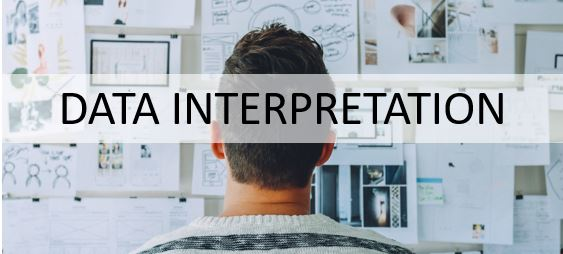

# HYPOTHESIS TESTING

Hypothesis testing is used to infer the result of a hypothesis performed on sample data from a larger population. The test tells the analyst whether or not his primary hypothesis is true. Statistical analysts test a hypothesis by measuring and examining a random sample of the population being analysed.

**Hypothesis in Science:** Provisional explanation that fits the evidence and can be confirmed or disproved.

**Hypothesis in Statistics:** Probabilistic explanation about the presence of a relationship between observations.

**Hypothesis in Machine Learning:** Candidate model that approximates a target function for mapping examples of inputs to outputs.



**A hypothesis in machine learning:**

> Covers the available evidence: the training dataset.

> Is falsifiable: a test harness is devised beforehand and used to estimate performance and compare it to a baseline model to see if is skillful or not.

> Can be used in new situations: make predictions on new data.



## **Hypothesis Test 1** High Numbers of Reviews Per Month and High Airbnb Rating  Given to Host

> The null hypothesis (H0) states that there is **no relationship between reviews per month and high Airbnb rating given to host.**


> The null hypothesis (HA) states that there is **a relationship between high average numbers of reviews per month and high Airbnb rating given to host (one variable has an effect on the other).** It states that the results are not due to chance and that they are significant in terms of supporting the theory being investigated.


In [11]:
Listings_Filtered_V2.reviews_per_month.isna().sum()

6255

In [12]:
# replace NaN's with value 'false' for not being a superhost

Listings_Filtered_V2.reviews_per_month.fillna(value= 0, inplace=True)
Listings_Filtered_V2.reviews_per_month.isna().sum()

0

In [13]:
# averaging reviews per month

Listings_Filtered_V2[Listings_Filtered_V2['High'] == 1]['reviews_per_month'].mean()

1.8766054005669137

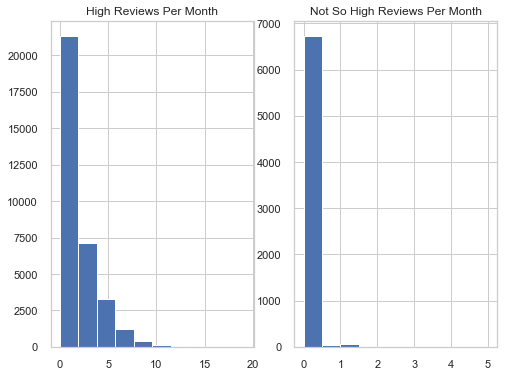

In [14]:
fig = plt.figure(figsize = (8, 6))

ax1 = plt.subplot(121)
Listings_Filtered_V2[Listings_Filtered_V2['High'] == 1]['reviews_per_month'].hist(ax = ax1)
ax1.set_title('High Reviews Per Month')

ax2 = plt.subplot(122)
Listings_Filtered_V2[Listings_Filtered_V2['High'] == 0]['reviews_per_month'].hist(ax = ax2)
ax2.set_title('Not So High Reviews Per Month')

plt.show()

In [15]:
# Finding the average difference in reviews per month

original_diff = abs(Listings_Filtered_V2[Listings_Filtered_V2['High'] == 1]['reviews_per_month'].mean() - Listings_Filtered_V2[Listings_Filtered_V2['High'] == 0]['reviews_per_month'].mean())
original_diff

1.853254001709436

In [16]:
Listings_Filtered_V2.shape[0] / 2

20171.0

In [17]:
# Splitting the data into 2 random samples and see what the difference.  Repeat this 10,000 times to see how often the 

my_diffs = []

for i in range(10000):
    sample_a = Listings_Filtered_V2['reviews_per_month'].sample(int(Listings_Filtered_V2.shape[0]/2))
    sample_b = Listings_Filtered_V2.drop(sample_a.index)['reviews_per_month']
    diff = abs(np.mean(sample_a) - np.mean(sample_b))
    my_diffs.append(diff)

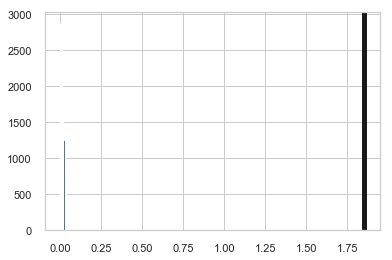

In [18]:
plt.hist(my_diffs)
plt.axvline(original_diff, color = 'k', linewidth = 5)
plt.show()

In [19]:
my_count = 0
for indv_diff in my_diffs:
    if indv_diff > original_diff:
        my_count += 1

In [20]:
my_count / len(my_diffs)

0.0

**T-TEST INTERPRETING HYPOTHESIS 1 T-TEST**

When you perform a statistical test a *p-value helps you determine the significance of your results in relation to the null hypothesis.*

In performing a hypothesis test in statistics, a p-value determine the significance of results. If the p-value is a number between 0 and 1 and interpreted in the following way: A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis, and accept the alternative hypothesis.

However, this does not mean that there is a 95% probability that the research hypothesis is true. The p-value is conditional upon the null hypothesis being true is unrelated to the truth or falsity of the research hypothesis.

> The Hypothesis 1 T-Test below indicates a low p-value (*p* < .001). A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis.Therefore we REJECT NULL HYPOTHESIS. 

In [21]:
stats.ttest_ind(Listings_Filtered_V2.dropna()['High'], Listings_Filtered_V2.dropna()['reviews_per_month'])
ttest_ind(Listings_Filtered_V2[Listings_Filtered_V2['High'] == 1]['reviews_per_month'], Listings_Filtered_V2[Listings_Filtered_V2['High'] == 0]['reviews_per_month'])

Ttest_indResult(statistic=77.58387739693124, pvalue=0.0)

**WELCH'S T-TEST**

> The Hypothesis 1 Welch's T-Test below indicates a low p-value. A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis.Therefore we REJECT NULL HYPOTHESIS.

In [22]:
# running welch's t-test

stats.ttest_ind(Listings_Filtered_V2[Listings_Filtered_V2['High'] == 1]['reviews_per_month'], Listings_Filtered_V2[Listings_Filtered_V2['High'] == 0]['reviews_per_month'], equal_var=False)

Ttest_indResult(statistic=169.58786697136577, pvalue=0.0)

**EFFECT SIZE (COHEN'S d)**
Cohen suggested that:

d=0.2 be considered a 'small' effect size

d=0.5 represents a 'medium' effect size

d=0.8 a 'large' effect size.

This means that if two groups' means don't differ by 0.2 standard deviations or more, the difference is trivial, even if it is statistically significant.

The positive (+) or negative (-) sign of Cohen's d depends on which sample means that we label for experimental group (C1), and control group (C2), then a negative effect size indicates the effect decreases your mean, and a positive effect size indicates that the effect increases your mean. If C1 is bigger than C2, your effect size will be positive. If the C2 mean is larger than C1, then the effect size will be negative. In short, the sign of Cohen’s d effect tells you the direction of the effect.

The p-value is not enough
A lower p-value is sometimes interpreted as meaning there is a stronger relationship between two variables. However, statistical significance means that it is unlikely that the null hypothesis is true (less than 5%).

Therefore, a significant p-value tells us that an intervention works, whereas an effect size tells us how much it works.
It can be argued that emphasizing the size of effect promotes a more scientific approach, as unlike significance tests, effect size is independent of sample size.

> The Hypothesis 1 Effect Size (Cohen's d) below indicates a higher than 0.8 d-value. Therefore, we can conclude that the effect size is very large.

In [23]:
# running effect size calculation

def cohens_d(group1, group2):
    numer = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group2)
    var1, var2 = group1.var(), group2.var()
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    denom = np.sqrt(pooled_var)
    return numer / denom
cohens_d(Listings_Filtered_V2[Listings_Filtered_V2['High'] == 1]['reviews_per_month'], Listings_Filtered_V2[Listings_Filtered_V2['High'] == 0]['reviews_per_month'])

1.0301960632727416

### Outcome Hypothesis Test 1 Average Reviews Per Month and High Rating Given to Airbnb Host

>**T-Test:** Statistically significant with a p < .001. Therefore, we reject the null hypothesis, and accept the alternative hypothesis.

>**Welch's T-Test:** Statistically significant with a p < .001. Therefore, we reject the null hypothesis, and accept the alternative hypothesis.

>**Cohen Effect Size:** High effect size with a 1.03.

## **Hypothesis Test 2** High Amenities Numbers and High Airbnb Rating  Given to Host

> The null hypothesis (H0) states that there is **no relationship between high average numbers of reviews per month and high amenities numbers.**


> The null hypothesis (HA) states that there is **a relationship between high average numbers of reviews per month and high amenities numbers (one variable has an effect on the other).** It states that the results are not due to chance and that they are significant in terms of supporting the theory being investigated.


In [24]:
# averaging numbers of amenities that would vote for high airbnb rating goven to host

Listings_Filtered_V2[Listings_Filtered_V2['High'] == 1]['amenities_number'].mean()

25.165239445024614

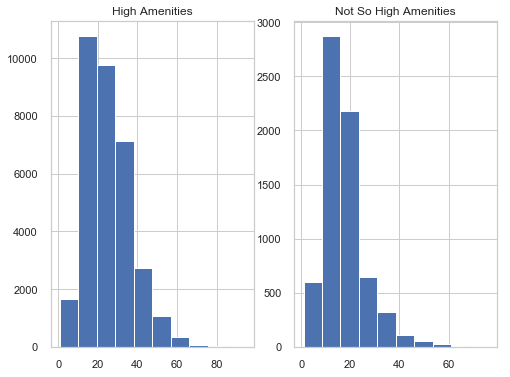

In [25]:
fig = plt.figure(figsize = (8, 6))

ax1 = plt.subplot(121)
Listings_Filtered_V2[Listings_Filtered_V2['High'] == 1]['amenities_number'].hist(ax = ax1)
ax1.set_title('High Amenities')

ax2 = plt.subplot(122)
Listings_Filtered_V2[Listings_Filtered_V2['High'] == 0]['amenities_number'].hist(ax = ax2)
ax2.set_title('Not So High Amenities')

plt.show()

In [26]:
# Finding the average difference in number of amenities

original_diff = abs(Listings_Filtered_V2[Listings_Filtered_V2['High'] == 1]['amenities_number'].mean() - Listings_Filtered_V2[Listings_Filtered_V2['High'] == 0]['amenities_number'].mean())
original_diff

7.9406898624846995

In [27]:
Listings_Filtered_V2.shape[0] / 2

20171.0

In [28]:
# Splitting the data into 2 random samples and see what the difference.  Repeat this 10,000 times to see how often the 
# difference is greater than 1.2 (my original difference)

my_diffs = []

for i in range(10000):
    sample_a = Listings_Filtered_V2['amenities_number'].sample(int(Listings_Filtered_V2.shape[0]/2))
    sample_b = Listings_Filtered_V2.drop(sample_a.index)['amenities_number']
    diff = abs(np.mean(sample_a) - np.mean(sample_b))
    my_diffs.append(diff)

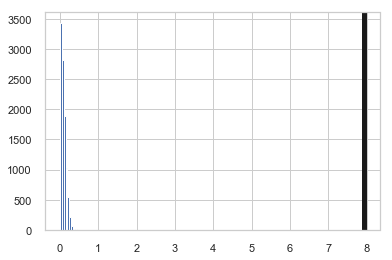

In [29]:
plt.hist(my_diffs)
plt.axvline(original_diff, color = 'k', linewidth = 5)
plt.show()

In [30]:
my_count = 0
for indv_diff in my_diffs:
    if indv_diff > original_diff:
        my_count += 1

In [31]:
my_count / len(my_diffs)

0.0

**T-TEST INTERPRETING HYPOTHESIS 2 T-TEST**

When you perform a statistical test a *p-value helps you determine the significance of your results in relation to the null hypothesis.*

In performing a hypothesis test in statistics, a p-value determine the significance of results. If the p-value is a number between 0 and 1 and interpreted in the following way: A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis, and accept the alternative hypothesis.

However, this does not mean that there is a 95% probability that the research hypothesis is true. The p-value is conditional upon the null hypothesis being true is unrelated to the truth or falsity of the research hypothesis.

> The Hypothesis 2 T-Test below indicates a low p-value (*p* < .001). A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis.Therefore we REJECT NULL HYPOTHESIS. 

In [32]:
stats.ttest_ind(Listings_Filtered_V2.dropna()['High'], Listings_Filtered_V2.dropna()['amenities_number'])
ttest_ind(Listings_Filtered_V2[Listings_Filtered_V2['High'] == 1]['amenities_number'], Listings_Filtered_V2[Listings_Filtered_V2['High'] == 0]['amenities_number'])

Ttest_indResult(statistic=54.71672262500067, pvalue=0.0)

**WELCH'S T-TEST**

> The Hypothesis 2 Welch's T-Test below indicates a low p-value. A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis.Therefore we REJECT NULL HYPOTHESIS.

In [33]:
# running welch's t-test

stats.ttest_ind(Listings_Filtered_V2[Listings_Filtered_V2['High'] == 1]['amenities_number'], Listings_Filtered_V2[Listings_Filtered_V2['High'] == 0]['amenities_number'], equal_var=False)

Ttest_indResult(statistic=65.34540167227794, pvalue=0.0)

**EFFECT SIZE (COHEN'S d)**
Cohen suggested that:

d=0.2 be considered a 'small' effect size

d=0.5 represents a 'medium' effect size

d=0.8 a 'large' effect size.

This means that if two groups' means don't differ by 0.2 standard deviations or more, the difference is trivial, even if it is statistically significant.

The positive (+) or negative (-) sign of Cohen's d depends on which sample means that we label for experimental group (C1), and control group (C2), then a negative effect size indicates the effect decreases your mean, and a positive effect size indicates that the effect increases your mean. If C1 is bigger than C2, your effect size will be positive. If the C2 mean is larger than C1, then the effect size will be negative. In short, the sign of Cohen’s d effect tells you the direction of the effect.

The p-value is not enough
A lower p-value is sometimes interpreted as meaning there is a stronger relationship between two variables. However, statistical significance means that it is unlikely that the null hypothesis is true (less than 5%).

Therefore, a significant p-value tells us that an intervention works, whereas an effect size tells us how much it works.
It can be argued that emphasizing the size of effect promotes a more scientific approach, as unlike significance tests, effect size is independent of sample size.

> The Hypothesis 2 Effect Size (Cohen's d) below indicates a higher than 0.7 d-value. Therefore, we can conclude that the effect size is medium (inching toward large).

In [34]:
# running effect size calculation

def cohens_d(group1, group2):
    numer = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group2)
    var1, var2 = group1.var(), group2.var()
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    denom = np.sqrt(pooled_var)
    return numer / denom
cohens_d(Listings_Filtered_V2[Listings_Filtered_V2['High'] == 1]['amenities_number'], Listings_Filtered_V2[Listings_Filtered_V2['High'] == 0]['amenities_number'])

0.7265505475219172

### Outcome Hypothesis Test 2 Average Number of Amenities and High Rating Given to Airbnb Host

>**T-Test:** Statistically significant with a p < .001. Therefore, we reject the null hypothesis, and accept the alternative hypothesis.

>**Welch's T-Test:** Statistically significant with a p < .001. Therefore, we reject the null hypothesis, and accept the alternative hypothesis.

>**Cohen Effect Size:** Medium effect size with a 0.7.

## **Hypothesis Test 3** Host is a Superhost and High Airbnb Rating  Given to Host

> The null hypothesis (H0) states that there is **no relationship between high average numbers of reviews per month and host is a superhost.**


> The null hypothesis (HA) states that there is **a relationship between high average numbers of reviews per month and host is a superhost. (one variable has an effect on the other).** It states that the results are not due to chance and that they are significant in terms of supporting the theory being investigated.


In [49]:
Listings_Filtered_V2.host_is_superhost.isna().sum()

0

In [50]:
# replace NaN's with value 'false' for not being a superhost

Listings_Filtered_V2.host_is_superhost.fillna(value= 0, inplace=True)
Listings_Filtered_V2.host_is_superhost.isna().sum()

0

In [51]:
# checking the values

Listings_Filtered_V2.groupby('host_is_superhost')['High'].value_counts()

host_is_superhost  High
0.0                1       23113
                   0        6498
1.0                1       10402
                   0         329
Name: High, dtype: int64

In [52]:
table = [[23095, 6490], [10402, 329]]

In [53]:
chi2_contingency(table)

(1994.1412339107135, 0.0, 1, array([[24581.02849985,  5003.97150015],
        [ 8915.97150015,  1815.02849985]]))

**T-TEST INTERPRETING HYPOTHESIS 3 T-TEST**

When you perform a statistical test a *p-value helps you determine the significance of your results in relation to the null hypothesis.*

In performing a hypothesis test in statistics, a p-value determine the significance of results. If the p-value is a number between 0 and 1 and interpreted in the following way: A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis, and accept the alternative hypothesis.

However, this does not mean that there is a 95% probability that the research hypothesis is true. The p-value is conditional upon the null hypothesis being true is unrelated to the truth or falsity of the research hypothesis.

> The Hypothesis 3 T-Test below indicates a low p-value (*p* < .001). A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis.Therefore we REJECT NULL HYPOTHESIS. 

In [55]:
stats.ttest_ind(Listings_Filtered_V2.dropna()['High'], Listings_Filtered_V2.dropna()['host_is_superhost'])
ttest_ind(Listings_Filtered_V2[Listings_Filtered_V2['High'] == 1]['host_is_superhost'], Listings_Filtered_V2[Listings_Filtered_V2['High'] == 0]['host_is_superhost'])

Ttest_indResult(statistic=45.83256942503548, pvalue=0.0)

**WELCH'S T-TEST**

> The Hypothesis 3 Welch's T-Test below indicates a low p-value. A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis.Therefore we REJECT NULL HYPOTHESIS.

In [54]:
# running welch's t-test

stats.ttest_ind(Listings_Filtered_V2[Listings_Filtered_V2['High'] == 1]['host_is_superhost'], Listings_Filtered_V2[Listings_Filtered_V2['High'] == 0]['host_is_superhost'], equal_var=False)

Ttest_indResult(statistic=72.41953689099522, pvalue=0.0)

**EFFECT SIZE (COHEN'S d)**
Cohen suggested that:

d=0.2 be considered a 'small' effect size

d=0.5 represents a 'medium' effect size

d=0.8 a 'large' effect size.

This means that if two groups' means don't differ by 0.2 standard deviations or more, the difference is trivial, even if it is statistically significant.

The positive (+) or negative (-) sign of Cohen's d depends on which sample means that we label for experimental group (C1), and control group (C2), then a negative effect size indicates the effect decreases your mean, and a positive effect size indicates that the effect increases your mean. If C1 is bigger than C2, your effect size will be positive. If the C2 mean is larger than C1, then the effect size will be negative. In short, the sign of Cohen’s d effect tells you the direction of the effect.

The p-value is not enough
A lower p-value is sometimes interpreted as meaning there is a stronger relationship between two variables. However, statistical significance means that it is unlikely that the null hypothesis is true (less than 5%).

Therefore, a significant p-value tells us that an intervention works, whereas an effect size tells us how much it works.
It can be argued that emphasizing the size of effect promotes a more scientific approach, as unlike significance tests, effect size is independent of sample size.

> The Hypothesis 3 Effect Size (Cohen's d) below indicates a higher than 0.6 d-value. Therefore, we can conclude that the effect size is large.

In [56]:
# running effect size calculation

def cohens_d(group1, group2):
    numer = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group2)
    var1, var2 = group1.var(), group2.var()
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    denom = np.sqrt(pooled_var)
    return numer / denom
cohens_d(Listings_Filtered_V2[Listings_Filtered_V2['High'] == 1]['host_is_superhost'], Listings_Filtered_V2[Listings_Filtered_V2['High'] == 0]['host_is_superhost'])

0.6085854723569403

### Outcome Hypothesis Test 3 Host is a Superhost and High Rating Given to Airbnb Host

>**T-Test:** Statistically significant with a p < .001. Therefore, we reject the null hypothesis, and accept the alternative hypothesis.

>**Welch's T-Test:** Statistically significant with a p < .001. Therefore, we reject the null hypothesis, and accept the alternative hypothesis.

>**Cohen Effect Size:** Medium effect size with a 0.6.

# CONCLUSION

**When you perform a statistical test a p-value helps you determine the significance of your results in relation to the null hypothesis.**

> All the three Hypothesis Testing results are statistically significant at *p* < .001. Therefore, we reject the null hypothesis, and accept the alternative hypothesis. 

**Cohen suggested that d=0.2 be considered a 'small' effect size, 0.5 represents a 'medium' effect size and 0.8 a 'large' effect size. This means that if two groups' means don't differ by 0.2 standard deviations or more, the difference is trivial, even if it is statistically significant.**

> Two hypothesis tests have medium effect size, and one hypothesis test has large effect size.

Effect size is a quantitative measure of the magnitude of the experimenter effect. The larger the effect size the stronger the relationship between two variables.


# LIMITATION AND FUTURE SCOPE

There is still a lot of debate between statistical significance, and *p* value.  This Jupyter Notebook Project briefly touched on this subject.

### **LIMITATION**

This Jupyter Notebook Project touched on just top three influential / predictors of high host ratings. If time permits, a more rigourous hypothesis testing exercise and the interpretation of other influential / predictors will be beneficial.

### **FUTURE SCOPE**

1. Hypothesis testing on low host rating - understanding the negatives provide more opportunities to think about areas for improvement. 

2. In other Jupyter Notebook Project, I touched on the difference of three cities (i.e. Dublin, Edinburgh, and Melbourne). It will be interesting to conduct hypothesis testing on the difference among these three UNESCO Cities of Literature. 

3. Explore the business value / interpretation of these hypothesis testing outcome. Asking the so-what question, and later answering the so-what questions. 



# POCKET GUIDEBOOK

In the Medium Blog search for: 

1. Andrew Wong + How to better design data differentiator to solve heard problem.

2. Andrew Wong + How to sell your data insights to broader stakeholders.

**Thank you for reading this Jupyter Notebook. Feedback is welcome, please email at andrewwongls@outlook.com**